In [1]:
#
import pandas
from statsmodels.tsa.seasonal import MSTL
from matplotlib import pyplot

#
from prophet import Prophet

#


Importing plotly failed. Interactive plots will not work.


In [763]:
# driver = 'JTU5300QUL'
# driver = 'QUSR628BIS'
# driver = 'RAILFRTCARLOADSD11'
# driver = 'FRGSHPUSM649NCIS'
# driver = 'TSIFRGHT'
# driver = 'AIRRTMFMD11'
driver = 'CUUR0000SEHA'
series = pandas.read_csv('./data/{0}.csv'.format(driver))
# series = data[[driver]].copy()
# series = series.reset_index().rename(columns={'jx': 'ds', driver: 'y'})
series = series.rename(columns={'DATE': 'ds', driver: 'y'})
series['ds'] = pandas.to_datetime(series['ds'])
series['y'] = series['y'].apply(func=lambda x: pandas.NA if x == '.' else x)
series['y'] = series['y'].ffill()
series['y'] = pandas.to_numeric(series['y'])
series = series[series['ds'] > '1970-01-01']
# series['y'] = series['y'].pct_change()
# series = series[series['ds'] > '2000-01-01']
series

,ds,y
662,1970-02-01,45.800
663,1970-03-01,46.000
664,1970-04-01,46.100
665,1970-05-01,46.200
666,1970-06-01,46.400
...,...,...
1301,2023-05-01,396.726
1302,2023-06-01,398.593
1303,2023-07-01,400.210
1304,2023-08-01,402.247


In [764]:
# series.set_index('ds').iloc[80:120, :].plot(style='.')  # '.-'

<Axes: xlabel='ds'>

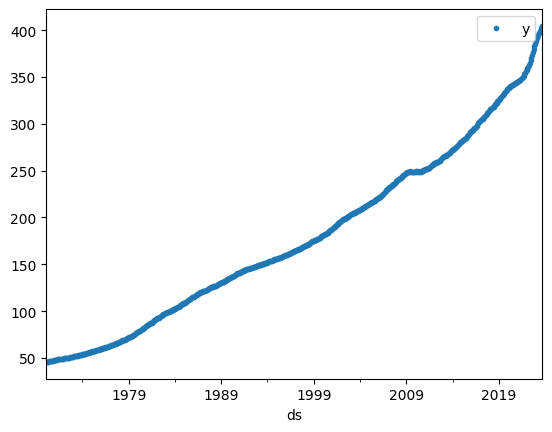

In [765]:
series.set_index('ds').plot(style='.')  # '.-'

In [781]:

# seasonality_mode: additive multiplicative
# changepoint_prior_scale -- breakpoint regularization [default=0.05; greater => more flexible]
# changepoint_range -- rate of the history where breakpoints may occur [default=0.80]
# mcmc_samples -- seasonality uncertainty [default=0]
m = Prophet(seasonality_mode='additive', interval_width=0.90, mcmc_samples=300, changepoint_prior_scale=0.005, changepoint_range=1.0)
# m = Prophet(seasonality_mode='additive', interval_width=0.90, mcmc_samples=300, changepoints=['2009-01-01', '2019-01-01'])
# m = Prophet(seasonality_mode='additive', interval_width=0.90, mcmc_samples=300, changepoints=['2009-01-01'])

# m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# m.add_seasonality(name='', period=1200, fourier_order=80)
m.add_seasonality(name='', period=2400, fourier_order=160)

m.fit(series)

06:00:06 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

06:00:51 - cmdstanpy - INFO - CmdStan done processing.
06:00:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf:

In [782]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
future = m.make_future_dataframe(periods=48, freq='MS') # , freq='MS'  'M' 'Q'
from pandas.tseries.offsets import DateOffset
# future['ds'] = future['ds'] + DateOffset(days=1)
future.tail()

,ds
687,2027-05-01
688,2027-06-01
689,2027-07-01
690,2027-08-01
691,2027-09-01


In [783]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
687,2027-05-01,439.097734,432.294887,445.812211
688,2027-06-01,440.004145,433.185609,446.731688
689,2027-07-01,441.529053,434.178157,449.044043
690,2027-08-01,444.980065,438.414521,452.357376
691,2027-09-01,446.613646,438.700517,454.409479


C:\TET\env\macrox\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\TET\env\macrox\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


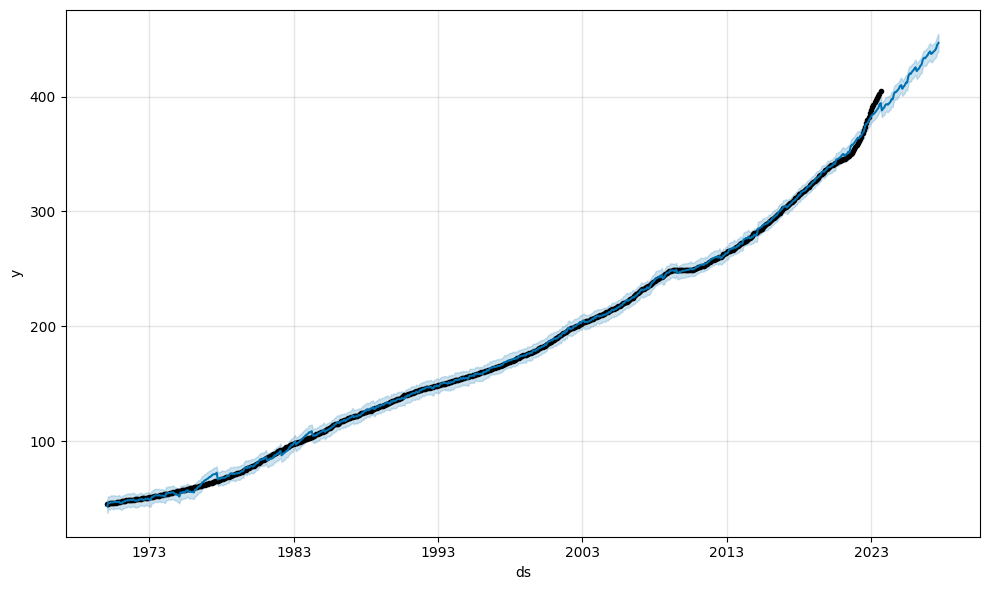

In [784]:
fig1 = m.plot(forecast)

C:\TET\env\macrox\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\TET\env\macrox\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\TET\env\macrox\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

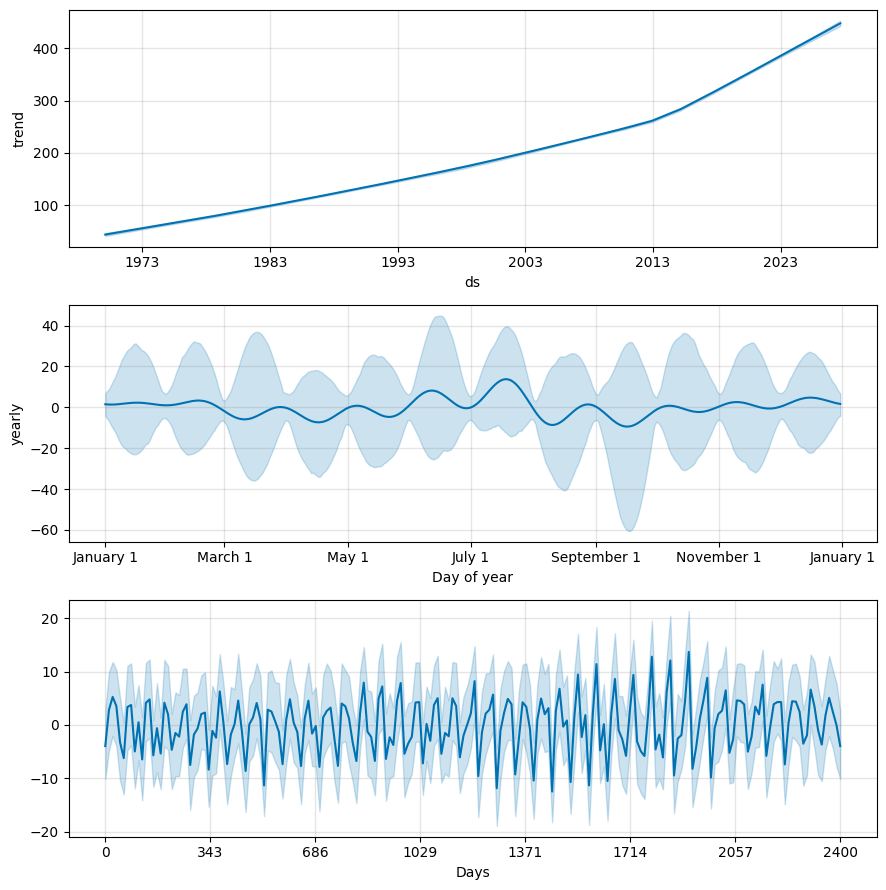

In [785]:
fig2 = m.plot_components(forecast)

In [786]:
predictions = series[['ds', 'y']].copy()
predictions = m.predict(predictions)
predictions = series[['ds', 'y']].merge(right=predictions, left_on='ds', right_on='ds', how='left')
predictions['resid'] = predictions['y'] - predictions['yhat']
predictions

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,,_lower,_upper,...,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,resid
0,1970-02-01,45.800,43.558668,37.893938,49.562359,40.894809,46.463361,-0.740467,-7.767584,6.605392,...,-3.959101,4.388297,0.956408,-6.250160,7.183086,0.0,0.0,0.0,43.774609,2.025391
1,1970-03-01,46.000,43.875956,41.388737,52.392086,41.228326,46.776282,4.706860,-1.416994,11.082686,...,-0.722606,6.878911,-1.757381,-7.126692,3.206528,0.0,0.0,0.0,46.825435,-0.825435
2,1970-04-01,46.100,44.227240,40.774743,52.308875,41.597272,47.120917,2.602966,-5.226951,9.155715,...,-1.224915,5.860286,-0.338232,-6.096143,6.654247,0.0,0.0,0.0,46.491974,-0.391974
3,1970-05-01,46.200,44.567192,42.005494,52.751822,41.954296,47.417979,3.100268,-3.944862,10.704512,...,-1.043855,6.470248,-0.491624,-8.079674,5.787254,0.0,0.0,0.0,47.175836,-0.975836
4,1970-06-01,46.400,44.918476,41.318558,53.090024,42.326223,47.722174,0.932917,-5.724304,8.586192,...,-1.868914,5.793485,1.131151,-6.405644,6.487955,0.0,0.0,0.0,46.982544,-0.582544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,2023-05-01,396.726,390.066060,380.885331,392.177286,387.384184,392.782778,-2.549480,-9.954918,5.736100,...,-6.767730,0.646020,-0.614394,-8.032977,5.528980,0.0,0.0,0.0,386.902186,9.823814
640,2023-06-01,398.593,391.196653,382.890474,393.843187,388.494551,393.944666,-3.542716,-9.582292,3.957527,...,-6.386004,1.177487,0.890013,-6.026129,6.471252,0.0,0.0,0.0,388.543950,10.049050
641,2023-07-01,400.210,392.290775,384.160636,395.323716,389.559042,395.050723,-2.196706,-8.867423,5.145142,...,-6.693605,1.384053,-0.249401,-6.113753,5.321525,0.0,0.0,0.0,389.844668,10.365332
642,2023-08-01,402.247,393.421368,387.605654,398.432268,390.659795,396.194848,-0.569210,-6.567925,5.439661,...,-4.482124,3.078158,-0.021804,-5.503221,5.272623,0.0,0.0,0.0,392.830354,9.416646


C:\TET\env\macrox\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\TET\env\macrox\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


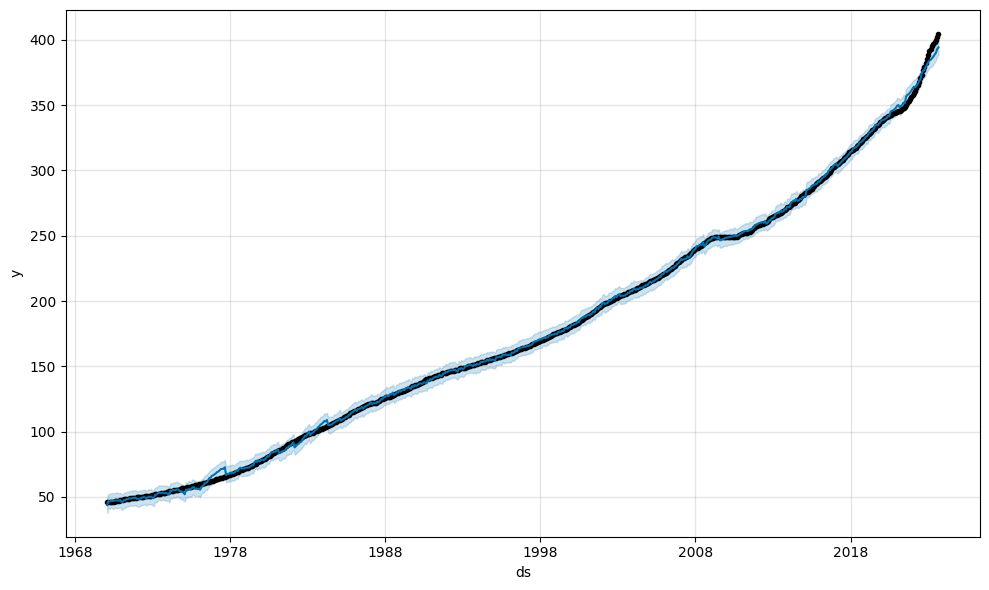

In [787]:
fig11 = m.plot(predictions)

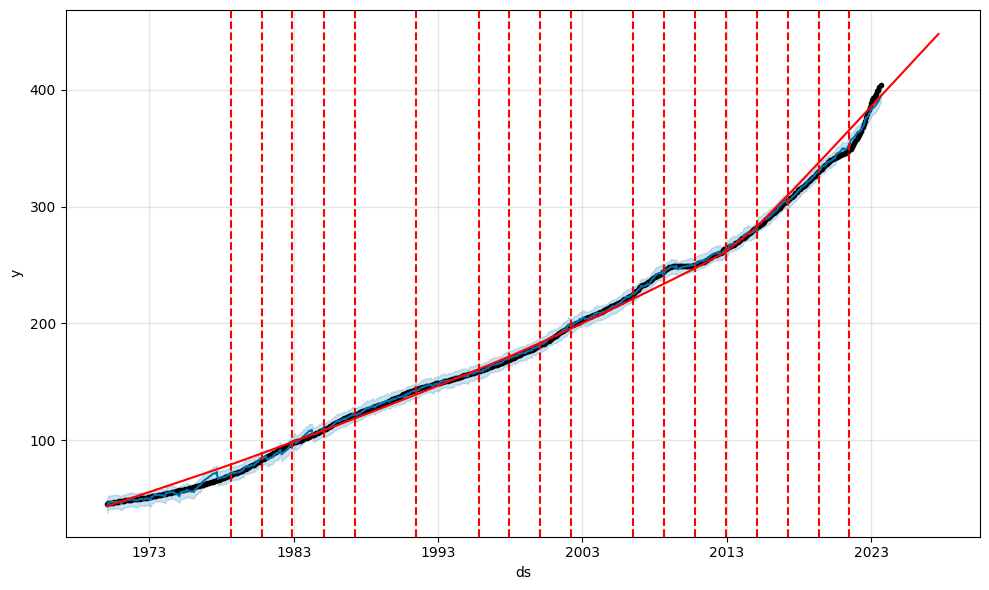

In [788]:
from prophet.plot import add_changepoints_to_plot
fig12 = m.plot(predictions)
a = add_changepoints_to_plot(fig12.gca(), m, forecast)

<Axes: xlabel='ds'>

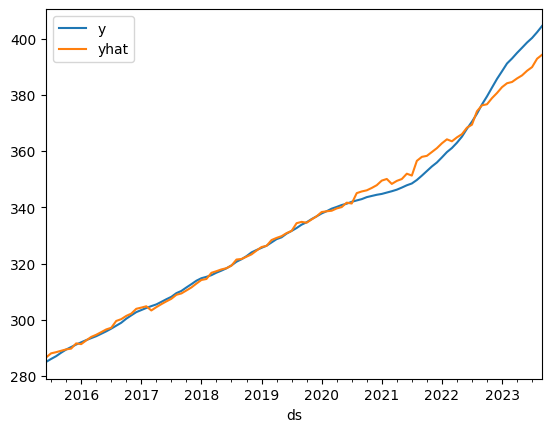

In [789]:
predictions[['ds', 'y', 'yhat']].iloc[-100:, :].set_index('ds').plot()

In [790]:
from sklearn.metrics import r2_score
from functional import SomersD as somersd

In [791]:
r2_score(y_true=predictions['y'].values, y_pred=predictions['yhat'].values)

0.9995760684818346

In [792]:
somersd(x=predictions['y'].values, y=predictions['yhat'].values)

0.9932333877495823

<Axes: xlabel='ds'>

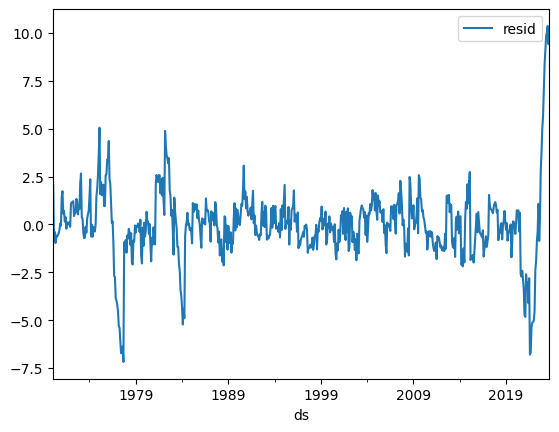

In [793]:
predictions.set_index('ds')[['resid']].plot()

<Axes: >

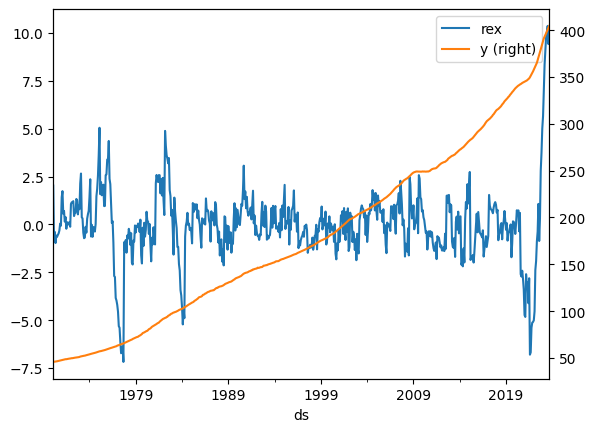

In [794]:
predictions['rex'] = predictions['y'] - predictions[''] - predictions['trend'] - predictions['yearly']
ax = predictions.set_index('ds')[['rex']].plot()
predictions.set_index('ds')[['y']].plot(secondary_y=True, ax=ax)

In [795]:
predictions.columns

Index(['ds', 'y', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', '', '_lower', '_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat',
       'resid', 'rex'],
      dtype='object')

In [726]:
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)

In [460]:
# plot_components_plotly(m, forecast)